In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [67]:
data=pd.read_csv("/content/Loan Dataset.csv")

In [68]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
data.shape

(614, 13)

In [71]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
data=data.dropna()

In [73]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [74]:
data=data.replace({"Gender":{"Male":0,"Female":1},
              "Married":{"Yes":1,"No":0},
              "Education":{"Graduate":1,"Not Graduate":0},
              "Self_Employed":{"Yes":1,"No":0}})

In [75]:
data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [76]:
data=data.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
              'Loan_Status':{'Y':1,'N':0}})

In [77]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [78]:
data=data.replace(to_replace='3+',value=4)

<Axes: xlabel='Married', ylabel='count'>

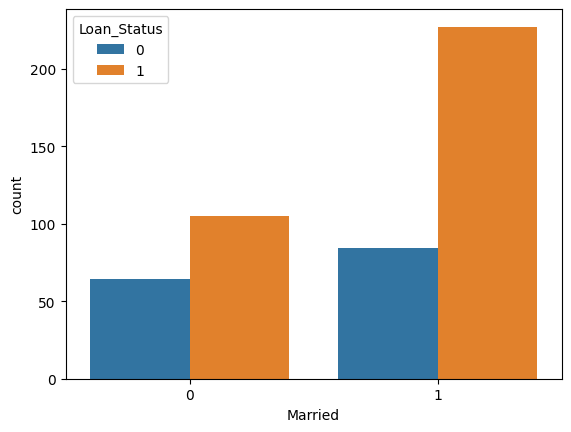

In [79]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [80]:
X=data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=data['Loan_Status']

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [82]:

Y_train.shape

(432,)

In [83]:
classifier=svm.SVC(kernel='linear')

In [84]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [87]:
train_prediction=classifier.predict(X_train)

In [90]:
train_accuracy=accuracy_score(train_prediction,Y_train)
print(train_accuracy)

0.7476851851851852


In [89]:
test_prediction=classifier.predict(X_test)

In [91]:
test_accuracy=accuracy_score(test_prediction,Y_test)
print(test_accuracy)

0.8333333333333334
